In [98]:
import os
import numpy as np
import pandas as pd
import  matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn import preprocessing
from scipy import stats 
import seaborn as sns 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [99]:
df = pd.read_csv(r"C:\Users\Benjamin\Desktop\icon\Downloads\weatherAUS.csv")

In [100]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [102]:
df.shape

(145460, 23)

In [103]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


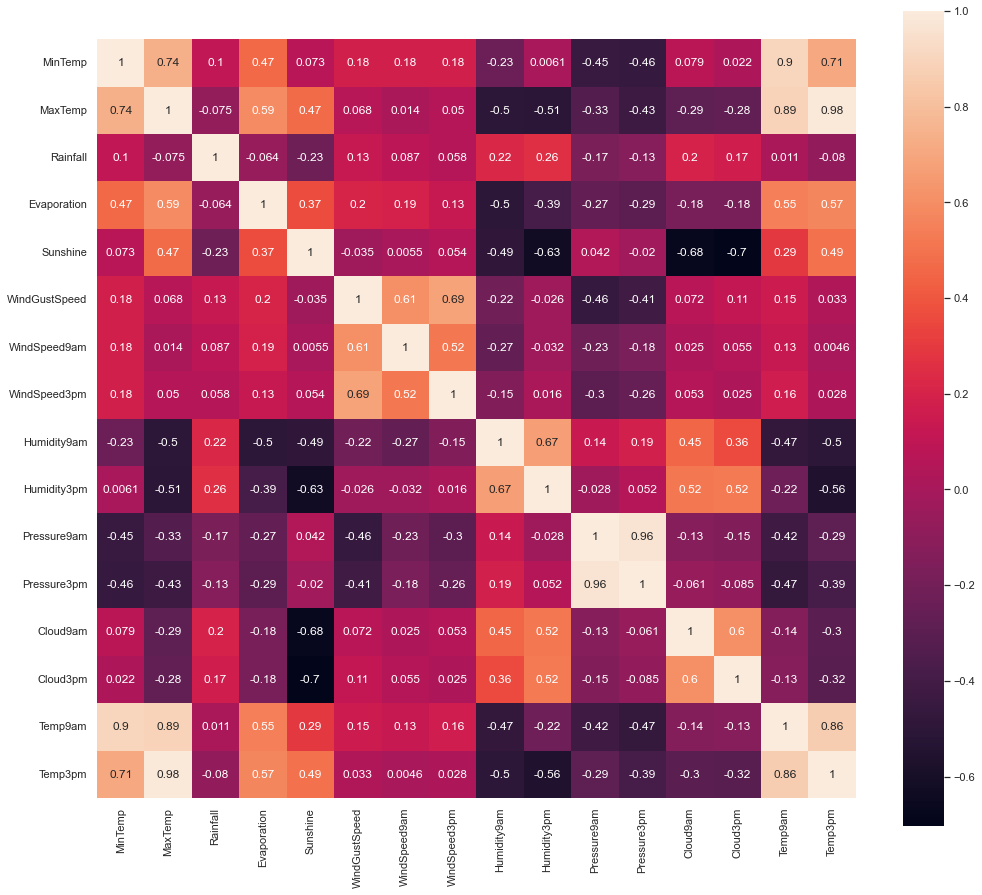

In [104]:
plt.figure(figsize=(17,15))
correlacao = sns.heatmap(df.corr(), square=True, annot=True)
correlacao.set_xticklabels(correlacao.get_xticklabels(), rotation=90)          
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MaxTemp'>

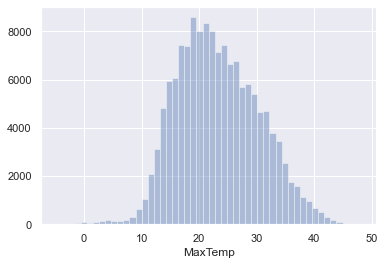

In [105]:
sns.set(color_codes = True)
sns.distplot(df.MaxTemp, kde = False)

<AxesSubplot:xlabel='MinTemp'>

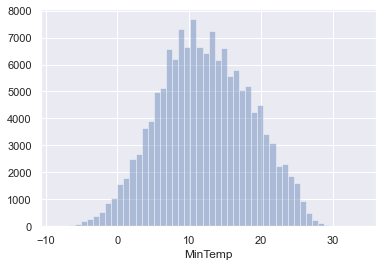

In [106]:
sns.set(color_codes = True)
sns.distplot(df.MinTemp, kde = False)

In [107]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [133]:
df['MinTemp']=df['MinTemp'].fillna(0)
df['MaxTemp']=df['MaxTemp'].fillna(0)
df['Rainfall']=df['Rainfall'].fillna(0)
df['Evaporation']=df['Evaporation'].fillna(0)
df['Sunshine']=df['Sunshine'].fillna(0)
df['WindGustSpeed']=df['WindGustSpeed'].fillna(0)
df['WindSpeed9am']=df['WindSpeed9am'].fillna(0)
df['WindSpeed3pm']=df['WindSpeed3pm'].fillna(0)
df['Humidity9am']=df['Humidity9am'].fillna(0)
df['Humidity3pm']=df['Humidity3pm'].fillna(0)
df['Pressure9am']=df['Pressure9am'].fillna(0)
df['Pressure3pm']=df['Pressure3pm'].fillna(0)
df['Cloud9am']=df['Cloud9am'].fillna(0)
df['Cloud3pm']=df['Cloud3pm'].fillna(0)
df['Temp9am']=df['Temp9am'].fillna(0)
df['Temp3pm']=df['Temp3pm'].fillna(0)

df['RainTomorrow']=df['RainTomorrow'].fillna(0)
df['WindDir9am'] = df['WindDir9am'].fillna(0)
df['WindGustDir'] = df['WindGustDir'].fillna(0)
df['WindDir3pm'] = df['WindDir3pm'].fillna(0)


In [134]:
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [135]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,0.0,0.0,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,0.0,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,0.0,0.0,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,0.0,0.0,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,0.0,0.0,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,0.0,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,0.0,0.0,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,0.0,0.0,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,0.0,0.0,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,0.0,0.0,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,0.0,0.0,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,0.0,0.0,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,0.0,0.0,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,0.0,0.0,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,0.0,0.0,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,0.0,0.0,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [136]:
df['RainTomorrow'].value_counts()

No     110316
Yes     31877
0        3267
Name: RainTomorrow, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


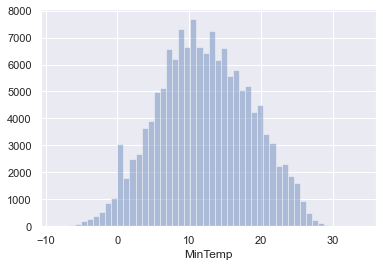

In [137]:
sns.set(color_codes = True)
sns.distplot(df.MinTemp, kde = False)
plt.show()

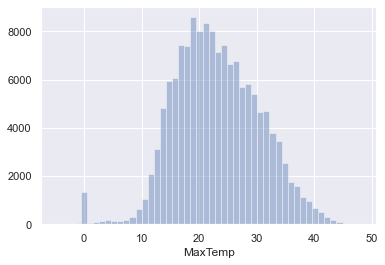

In [138]:
sns.set(color_codes = True)
sns.distplot(df.MaxTemp, kde = False)
plt.show()

In [139]:
from sklearn.model_selection import train_test_split

In [140]:
#y or labels/Answers  = RainTomorrow & Rain Today
#x Predictors  = df -  RainTomorrow & Rain Today

df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,0.0,0.0,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,0.0,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,0.0,0.0,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,0.0,0.0,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,0.0,0.0,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,0.0,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,0.0,0.0,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,0.0,0.0,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,0.0,0.0,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [195]:
#X = features
#Y = Labels

X = df[['MinTemp' , 'MaxTemp' , 'WindGustSpeed' , 'Rainfall']]
Y = df['RainToday']

X_train , X_test , Y_train , Y_test = train_test_split(X, Y ,train_size=0.7 , test_size = 0.3 , random_state=0) 
                                                    

In [196]:
#shapes of both training data and testing data
print("X_train =" , X_train.shape)
print("X_test =" , X_test.shape)
print("Y_train =" ,Y_train.shape)
print("Y_test =" ,Y_test.shape)

X_train = (101822, 4)
X_test = (43638, 4)
Y_train = (101822,)
Y_test = (43638,)


In [197]:
X_train

,MinTemp,MaxTemp,WindGustSpeed,Rainfall
139678,23.4,32.8,35.0,0.0
137661,0.6,21.2,37.0,0.0
3459,18.3,24.9,31.0,0.0
58953,13.6,22.0,46.0,0.4
3521,4.2,18.4,19.0,0.0
...,...,...,...,...
41993,17.8,38.1,39.0,0.0
97639,12.5,27.3,30.0,0.0
95939,17.0,29.8,22.0,0.0
117952,11.9,22.0,35.0,3.8


In [198]:
X_test

,MinTemp,MaxTemp,WindGustSpeed,Rainfall
138175,21.9,39.4,57.0,1.6
38638,20.5,37.5,59.0,0.0
124058,5.1,17.2,50.0,0.2
99214,11.9,16.8,28.0,1.0
25097,7.5,21.3,15.0,0.0
...,...,...,...,...
137815,18.5,41.0,37.0,0.0
142790,8.0,26.9,52.0,0.0
108533,7.7,21.1,22.0,0.0
24366,4.2,19.4,28.0,5.0


In [199]:
Y_train

139678    0
137661    0
3459      0
58953     0
3521      0
         ..
41993     0
97639     0
95939     0
117952    0
43567     0
Name: RainToday, Length: 101822, dtype: int64

In [200]:
Y_test

138175    0
38638     0
124058    0
99214     0
25097     0
         ..
137815    0
142790    0
108533    0
24366     0
131905    0
Name: RainToday, Length: 43638, dtype: int64

In [201]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,0.0,0.0,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,0.0,16.9,21.8,0,0
1,2008-12-02,Albury,7.4,25.1,0.0,0.0,0.0,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,0.0,0.0,17.2,24.3,0,0
2,2008-12-03,Albury,12.9,25.7,0.0,0.0,0.0,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,0.0,2.0,21.0,23.2,0,0
3,2008-12-04,Albury,9.2,28.0,0.0,0.0,0.0,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,0.0,0.0,18.1,26.5,0,0
4,2008-12-05,Albury,17.5,32.3,1.0,0.0,0.0,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0


In [202]:
le = preprocessing.LabelEncoder()
df['RainToday'] = le.fit_transform(df['RainToday'])
# df['RainTomorrow'] = le.fit_transform(df['RainTommorow'])


In [203]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,0.0,0.0,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,0.0,16.9,21.8,0,0
1,2008-12-02,Albury,7.4,25.1,0.0,0.0,0.0,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,0.0,0.0,17.2,24.3,0,0
2,2008-12-03,Albury,12.9,25.7,0.0,0.0,0.0,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,0.0,2.0,21.0,23.2,0,0
3,2008-12-04,Albury,9.2,28.0,0.0,0.0,0.0,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,0.0,0.0,18.1,26.5,0,0
4,2008-12-05,Albury,17.5,32.3,1.0,0.0,0.0,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0


In [204]:
from sklearn.naive_bayes import GaussianNB

In [205]:
gaussian = GaussianNB()

In [206]:
#Fitting or training the data 
gaussian.fit(X_train , Y_train)

GaussianNB()

In [217]:
#predicting the variables
y_pred = gaussian.predict(X_test)


In [218]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [219]:
from sklearn import metrics

In [220]:
 print('Gaussian Naives Bayes Model accuracy: ' , metrics.accuracy_score(Y_test , y_pred) , "%") 

Gaussian Naives Bayes Model accuracy:  1.0 %
